### Coding single label nonlinear (spiral) dataset from scratch

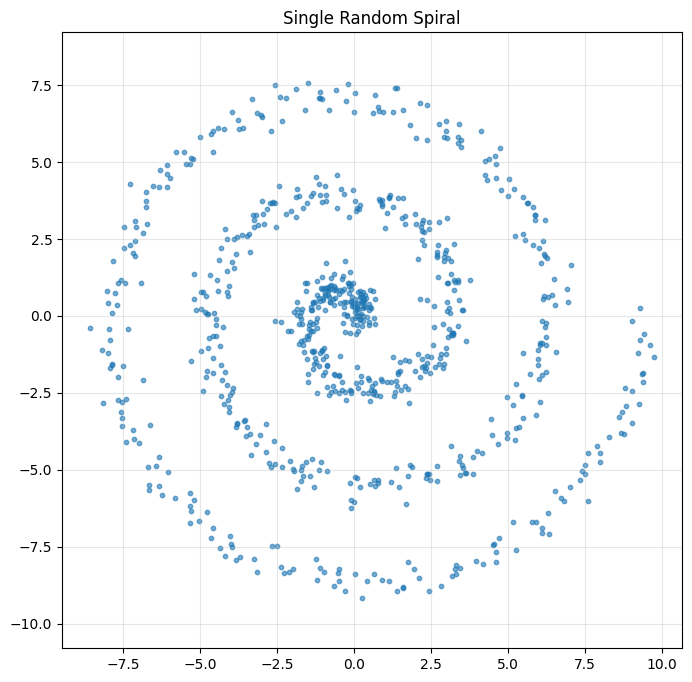

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def simple_spiral(n_points=1000, noise=0.1):
    """Generate a single spiral with random noise"""
    t = np.linspace(0, 6*np.pi, n_points)
    r = 0.5 * t

    x = r * np.cos(t) + noise * np.random.randn(n_points)
    y = r * np.sin(t) + noise * np.random.randn(n_points)

    return x, y

# Generate and plot
x, y = simple_spiral(n_points=800, noise=0.3)

plt.figure(figsize=(8, 8))
plt.scatter(x, y, alpha=0.6, s=10)
plt.title('Single Random Spiral')
plt.axis('equal')
plt.grid(True, alpha=0.3)
plt.show()

### Coding multi label nonlinear(spiral) dataset from scratch

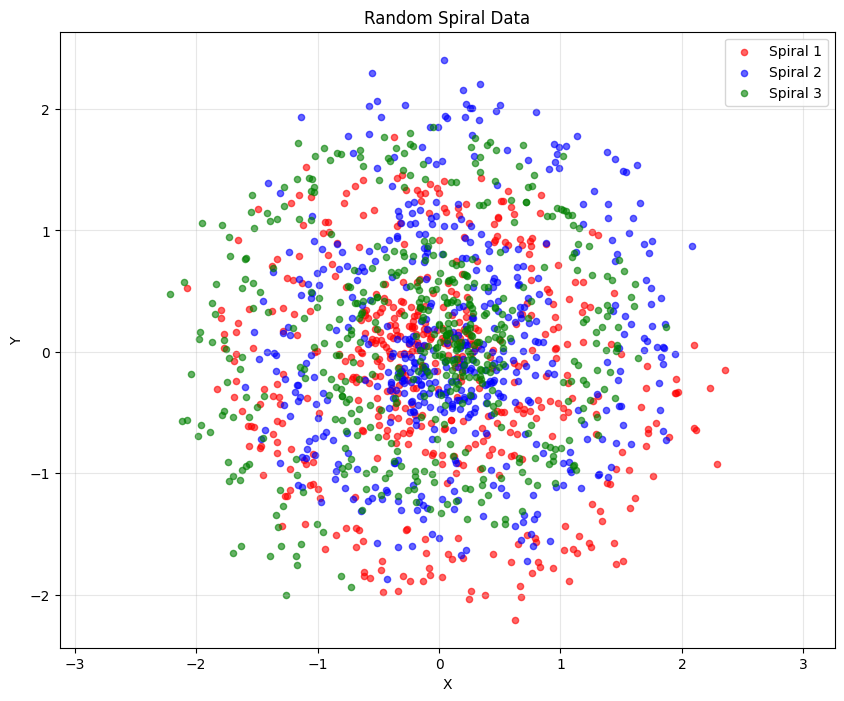

Generated 1500 total points
X range: [-2.22, 2.35]
Y range: [-2.21, 2.41]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def generate_spiral_data(n_points=1000, noise=0.1, n_spirals=2):
    """
    Generate random spiral data

    Parameters:
    n_points: number of data points
    noise: amount of random noise to add
    n_spirals: number of spiral arms
    """
    # Generate angles from 0 to 4π for multiple rotations
    t = np.linspace(0, 4*np.pi, n_points)

    # Generate spiral coordinates
    r = t / (2*np.pi)  # radius increases linearly with angle

    # Create multiple spiral arms
    x = []
    y = []
    labels = []

    for spiral in range(n_spirals):
        # Add phase offset for each spiral
        phase = spiral * (2*np.pi / n_spirals)

        # Calculate coordinates with phase offset
        x_spiral = r * np.cos(t + phase) + noise * np.random.randn(n_points)
        y_spiral = r * np.sin(t + phase) + noise * np.random.randn(n_points)

        x.extend(x_spiral)
        y.extend(y_spiral)
        labels.extend([spiral] * n_points)

    return np.array(x), np.array(y), np.array(labels)

# Generate the data
x, y, labels = generate_spiral_data(n_points=500, noise=0.2, n_spirals=3)

# Plot the results
plt.figure(figsize=(10, 8))
colors = ['red', 'blue', 'green', 'orange', 'purple']

for i in range(max(labels) + 1):
    mask = labels == i
    plt.scatter(x[mask], y[mask], c=colors[i], alpha=0.6, s=20, label=f'Spiral {i+1}')

plt.title('Random Spiral Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()

# Print some statistics
print(f"Generated {len(x)} total points")
print(f"X range: [{x.min():.2f}, {x.max():.2f}]")
print(f"Y range: [{y.min():.2f}, {y.max():.2f}]")

#### using standard libraries like "nnfs" to generate dataset

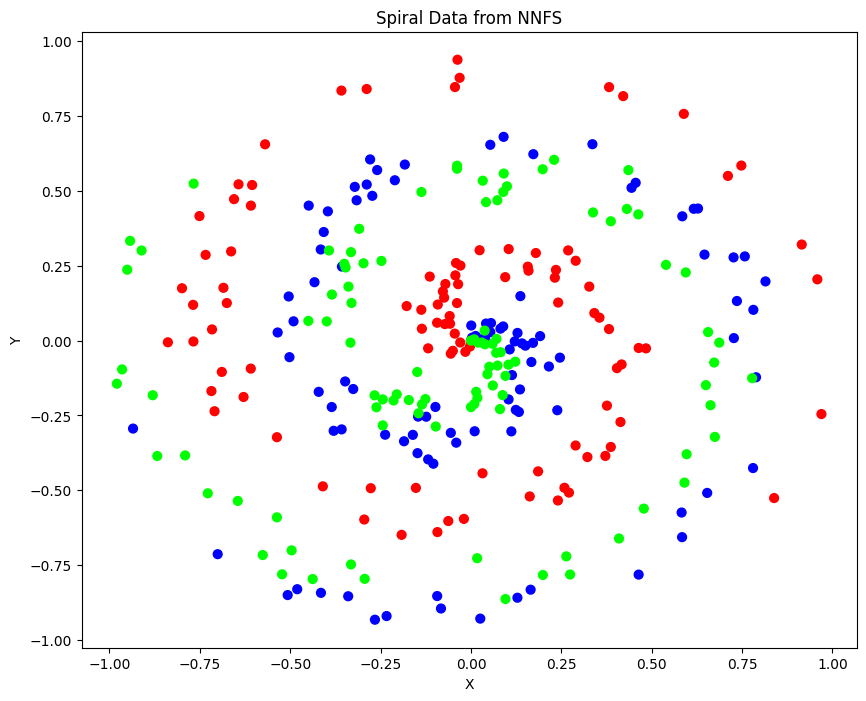

Data shape: (300, 2)
Labels shape: (300,)
Number of classes: 3


In [3]:
import nnfs
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt
import numpy as np

# Initialize nnfs (sets random seed for reproducibility)
nnfs.init()

# Generate spiral data
# Parameters: samples per class, number of classes
X, y = spiral_data(samples=100, classes=3)

# Plot the data
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')
plt.title('Spiral Data from NNFS')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

print(f"Data shape: {X.shape}")
print(f"Labels shape: {y.shape}")
print(f"Number of classes: {len(np.unique(y))}")